# Dragon Real Estate - Price Predicator

In [859]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
#Read the given CSV file, and view some sample records
df = pd.read_excel('housing.xlsx')

In [860]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,NaN,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,NaN,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       503 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [862]:
cou = df["CHAS"].value_counts()
print(cou)

0    471
1     35
Name: CHAS, dtype: int64


In [863]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,503.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286312,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704295,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.627000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Train-Test Splitting

In [864]:
#Learning Purpose: 

# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size= int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]


In [865]:
# train_set, test_set = split_train_test(df , 0.2)

In [866]:
# print(train_set)
# print(test_set)

In [867]:
# print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

In [868]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.20,random_state = 42)

In [869]:
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

Rows in train set : 404
Rows in test set : 102


In [870]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(test_size=0.2, random_state= 42)
for train_index, test_index in split.split(df , df["CHAS"]):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]
    print(train_index)
    

[254 348 476 321 326 411 250 100 429  57 413 115 490 199 494 142 113 468
 400 247 151 408  68 365  81  93 456 116  27 234 140  47 382 377 366 185
  73 267 231 118  96  40 182 417 492 373 294 482  62 414 289  72 314  89
 129 157 110 343 200 310 462 361  95  37 145 227 166  23  85 281 285 264
 501 440 241 473   0 488 452 323 252 416 119  60 251 409 191  42 188 412
  92 353 292 107  12   3 364 339 301 467 376 280 309 202  61  24 122 164
 278 139  10 415 390 338 445 486 156 179 159  22 318 404 425  45  74 147
 431 215 434  44  83 144 500 406 161 331 243 293  86 162 458 359 295 124
 341 244 319 337  15 384 248 441 258  31 481 450 316  66  56 211 184 325
  41  11 262 491 177 369 249 238 125   5 224 235 334 165 475  63 437 497
 226  25  78 178 214 222 410 220  94 344  51 187 132  70 127 402  64 229
 306 298 432 163 117 327 175 442 141 111 120 427 503   8 311 282  75 276
 149 349 454 444 313 131 312   9 112 393 436   6 317  59 453 287  65 154
 308 189  35 392  33 484 447 403 299 499 270 464  9

In [871]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 114 to 24
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       100 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  PRICE    102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [872]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [873]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [874]:
print(95/7)
print(376/28)           #Almost same ratio

13.571428571428571
13.428571428571429


In [875]:
df = strat_train_set.copy() #making copy of training dataset

# Looking for Correlations

In [876]:
corr_matrix = df.corr()

In [877]:
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE      1.000000
RM         0.686504
ZN         0.333173
B          0.311240
DIS        0.222076
CHAS       0.207772
AGE       -0.336123
RAD       -0.386387
CRIM      -0.396302
NOX       -0.416011
TAX       -0.482972
INDUS     -0.483676
PTRATIO   -0.497808
LSTAT     -0.737963
Name: PRICE, dtype: float64

<AxesSubplot: >

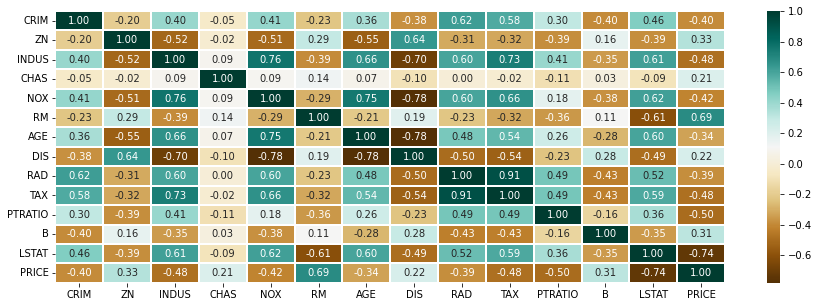

In [878]:
# Exploratory Data Analysis
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)



array([[<AxesSubplot: xlabel='PRICE', ylabel='PRICE'>,
        <AxesSubplot: xlabel='RM', ylabel='PRICE'>,
        <AxesSubplot: xlabel='ZN', ylabel='PRICE'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='PRICE'>],
       [<AxesSubplot: xlabel='PRICE', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='PRICE', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='PRICE', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

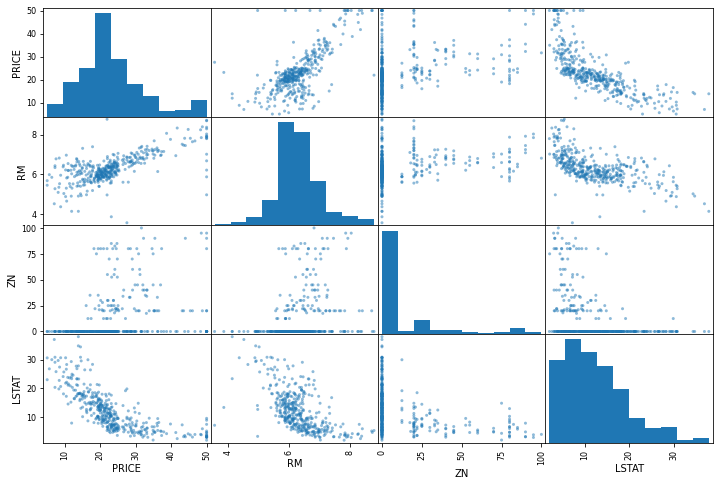

In [879]:
from pandas.plotting import scatter_matrix
attributes = ["PRICE","RM","ZN","LSTAT"]
scatter_matrix(df[attributes], figsize = (12,8))

<AxesSubplot: xlabel='RM', ylabel='PRICE'>

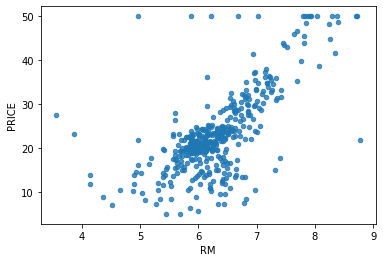

In [880]:
df.plot(kind = 'scatter' , x = "RM", y = "PRICE", alpha = 0.8)

# Trying out Attribte combinations:

In [881]:
df["TAXRM"] = df["TAX"]/df["RM"]

In [882]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TAXRM
313,0.26938,0.0,9.90,0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.90,21.6,48.515800
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8,113.768364
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,107.211848
36,0.09744,0.0,5.96,0,0.499,5.841,61.4,3.3779,5,279,19.2,377.56,11.41,20.0,47.765794
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8,50.768976


In [883]:
corr_matrix = df.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE      1.000000
RM         0.686504
ZN         0.333173
B          0.311240
DIS        0.222076
CHAS       0.207772
AGE       -0.336123
RAD       -0.386387
CRIM      -0.396302
NOX       -0.416011
TAX       -0.482972
INDUS     -0.483676
PTRATIO   -0.497808
TAXRM     -0.543316
LSTAT     -0.737963
Name: PRICE, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='PRICE'>

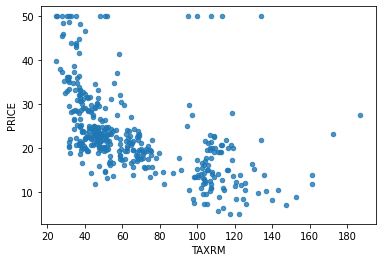

In [884]:
df.plot(kind = 'scatter' , x = "TAXRM", y = "PRICE", alpha = 0.8)

In [885]:
df = strat_train_set.drop("PRICE",axis = 1)
df_labels = strat_train_set["PRICE"].copy()

# Missing Attibutes

In [886]:
#To take care of missing attributes , you have three options:
#   1. Get rid of missing data points
#   2. get rid of whole attributes
#   3. Set the value to some value(Mean, Median)

In [887]:
# # Same dataset but having, Null values.
# df1 = pd.read_excel('housing.xlsx')

In [888]:
print(df.isnull().sum())
df.describe()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         1
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.765465,11.575495,10.939233,0.069307,0.553786,6.313928,67.549505,3.764232,9.378713,403.235149,18.318564,362.401411,12.260545
std,9.281380,23.426457,6.923286,0.254290,0.117126,0.725603,28.250917,2.058069,8.681153,169.490967,2.195004,82.176094,7.073648
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.071615,0.000000,4.930000,0.000000,0.448000,5.894500,42.375000,2.100525,4.000000,276.000000,16.800000,377.037500,6.642500
50%,0.218480,0.000000,8.560000,0.000000,0.528000,6.230000,73.450000,3.207450,5.000000,329.000000,18.700000,391.955000,10.665000
75%,3.569675,17.625000,18.100000,0.000000,0.631000,6.652000,94.500000,5.214600,24.000000,666.000000,20.200000,396.900000,16.245000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [889]:
a = df.dropna() #Option 1
a.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [890]:
a = df.drop("RM",axis = 1) #Option 2
print(a.shape)
print(a.head())
#There is RM column, And original housing dataframe will remain unchanged.

(404, 12)
         CRIM   ZN  INDUS  CHAS    NOX   AGE     DIS  RAD  TAX  PTRATIO  \
313   0.26938  0.0   9.90     0  0.544  82.8  3.2628    4  304     18.4   
444  12.80230  0.0  18.10     0  0.740  96.6  1.8956   24  666     20.2   
356   8.98296  0.0  18.10     1  0.770  97.4  2.1222   24  666     20.2   
36    0.09744  0.0   5.96     0  0.499  61.4  3.3779    5  279     19.2   
27    0.95577  0.0   8.14     0  0.538  88.8  4.4534    4  307     21.0   

          B  LSTAT  
313  393.39   7.90  
444  240.52  23.79  
356  377.73  17.60  
36   377.56  11.41  
27   306.38  17.28  


In [891]:
median = df["RM"].median() #Option 3

In [892]:
df["RM"].fillna(median)
# The original housing dataframe will remain unchanged. If we do "inplace = True" then it will reflect.

313    6.266
444    5.854
356    6.212
36     5.841
27     6.047
       ...  
163    8.375
348    6.635
279    6.812
314    6.567
349    6.939
Name: RM, Length: 404, dtype: float64

In [893]:
print(df.shape)
df.isnull().sum() #Before we started filling missing values

(404, 13)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         1
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [894]:
# making pipeline for missing values. If some test dataset also have missing values so put our median there.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [895]:
print(imputer.statistics_)    #"Median values of all Column"
df.isnull().sum()

[2.18480e-01 0.00000e+00 8.56000e+00 0.00000e+00 5.28000e-01 6.23000e+00
 7.34500e+01 3.20745e+00 5.00000e+00 3.29000e+02 1.87000e+01 3.91955e+02
 1.06650e+01]


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         1
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [896]:
X = imputer.transform(df) 
print(len(X))
print(type(X))

404
<class 'numpy.ndarray'>


In [897]:
housing_tr = pd.DataFrame(X, columns = df.columns)
print(df.isnull().sum())
print("------------")
print(housing_tr.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         1
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [898]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.765465,11.575495,10.939233,0.069307,0.553786,6.313720,67.549505,3.764232,9.378713,403.235149,18.318564,362.401411,12.260545
std,9.281380,23.426457,6.923286,0.254290,0.117126,0.724715,28.250917,2.058069,8.681153,169.490967,2.195004,82.176094,7.073648
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.071615,0.000000,4.930000,0.000000,0.448000,5.896250,42.375000,2.100525,4.000000,276.000000,16.800000,377.037500,6.642500
50%,0.218480,0.000000,8.560000,0.000000,0.528000,6.230000,73.450000,3.207450,5.000000,329.000000,18.700000,391.955000,10.665000
75%,3.569675,17.625000,18.100000,0.000000,0.631000,6.650500,94.500000,5.214600,24.000000,666.000000,20.200000,396.900000,16.245000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [899]:
df.describe()   #Training Dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.765465,11.575495,10.939233,0.069307,0.553786,6.313928,67.549505,3.764232,9.378713,403.235149,18.318564,362.401411,12.260545
std,9.281380,23.426457,6.923286,0.254290,0.117126,0.725603,28.250917,2.058069,8.681153,169.490967,2.195004,82.176094,7.073648
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.071615,0.000000,4.930000,0.000000,0.448000,5.894500,42.375000,2.100525,4.000000,276.000000,16.800000,377.037500,6.642500
50%,0.218480,0.000000,8.560000,0.000000,0.528000,6.230000,73.450000,3.207450,5.000000,329.000000,18.700000,391.955000,10.665000
75%,3.569675,17.625000,18.100000,0.000000,0.631000,6.652000,94.500000,5.214600,24.000000,666.000000,20.200000,396.900000,16.245000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

Primarily,Three types of objects :
1. Estimators - It  estimate some parameters based on datasets. (Eg.imputer)
It has a fit method and transform method. 
Fit method - Fits the dataset and calculates internal parameters.

2. Transformers - Transform method takes input returns output based on the learnings from fit(). It also has convenience funtion called fit_transfrom() which fits and then transform. It will give better result and it faster than if we doing seperately.

3. predicators - LinearRegression model is a example of predicator. fit() and predict() are two common functions. It also gives score() function which will evaluate the predications.

# Feature Scaling

Primarily,Two types of feature scaling methods:
1. Min-max scaling(Normalization) :
   [(value-min) / (max-min)]
   skelarn provides a class called MinMaxScaler for this.
   
2. Standardization :
   [(value-min)/std]
   Sklearn provides a class called Standard scaler for this.
   (This Best method due to change in one value by fault, Our Max and Min will change and "Normalization" method can't give good result).
   
Pipeline means do some work so it will automate . It includes series of steps.

# Creating a Pipepline

In [900]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])
# Pipeline take a list of pipelines.

In [901]:
housing_num_tr = my_pipeline.fit_transform(df)

In [902]:
housing_num_tr

array([[-0.37714436, -0.49473328, -0.15029298, ...,  0.03714646,
         0.37756738, -0.61721356],
       [ 0.97485937, -0.49473328,  1.0355843 , ...,  0.8582074 ,
        -1.4850126 ,  1.63193751],
       [ 0.5628435 , -0.49473328,  1.0355843 , ...,  0.8582074 ,
         0.18676472,  0.75577356],
       ...,
       [-0.38350905,  0.36006088, -1.10044099, ..., -1.55936092,
         0.4203335 , -1.04892601],
       [-0.36637615, -0.49473328, -0.15029298, ...,  0.03714646,
         0.40559076, -0.42188137],
       [-0.40307671,  1.21485505, -1.40124889, ...,  0.63013491,
         0.33443575, -0.90171914]])

# Selecting a desired model for dragon Real Estates

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Ensemble means combine so many classifiers and make a single classifier Or regressor and use it.

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,df_labels)


In [904]:
print(df_labels.shape)

(404,)


In [905]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]

In [933]:
prepared_data = my_pipeline.transform(some_data)
print(prepared_data)

[[-0.37714436 -0.49473328 -0.15029298 -0.27288841 -0.08365802 -0.06592866
   0.54049235 -0.24394412 -0.62035329 -0.58621527  0.03714646  0.37756738
  -0.61721356]
 [ 0.97485937 -0.49473328  1.0355843  -0.27288841  1.59182985 -0.63513319
   1.02957774 -0.90907974  1.68634464  1.55224002  0.8582074  -1.4850126
   1.63193751]
 [ 0.5628435  -0.49473328  1.0355843   3.66450153  1.84828208 -0.14053314
   1.05793052 -0.79884003  1.68634464  1.55224002  0.8582074   0.18676472
   0.75577356]
 [-0.39569259 -0.49473328 -0.72009255 -0.27288841 -0.46833635 -0.65309353
  -0.21794442 -0.18794858 -0.5050184  -0.73389865  0.40206243  0.18469343
  -0.12039038]
 [-0.30309921 -0.49473328 -0.40482274 -0.27288841 -0.13494846 -0.36849127
   0.75313817  0.33527653 -0.62035329 -0.56849327  1.22312337 -0.68256923
   0.71047914]]


In [907]:
t = model.predict(list((prepared_data)))
print(t)

[21.938 10.831 16.525 20.475 16.088]


In [908]:
print(list(some_labels))

[21.6, 10.8, 17.8, 20.0, 14.8]


# Evaluating the model

In [909]:
from sklearn.metrics import mean_squared_error
housing_predications = model.predict(housing_num_tr)
# lin_mse =  mean_squared_error(df_labels,housing_predications)
# lin_rmse = np.sqrt(lin_mse)
mse =  mean_squared_error(df_labels,housing_predications)
rmse = np.sqrt(lin_mse)


In [910]:
# print(lin_mse)  #It is not so good so,we use different model.
print(rmse)
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# model = LinearRegression()
# model.fit(housing_num_tr,df_labels)

#Overfitting happens in above data. Model learn our training data very deeply.

0.0


# Using better evaluation technique - Cross Validation

In [911]:
#1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, df_labels, scoring = "neg_mean_squared_error" , cv=10)
rmse_score = np.sqrt(-scores)

# Cross validation want utility. grether utility is better. So, it is taking "neg_mean_squared_error" so it maximize it utility. 
#cv = 10 fold : 10

In [912]:
rmse_score

array([4.84226791, 4.00470292, 3.08759327, 2.37062491, 2.82651121,
       2.66415292, 3.20314393, 2.10615109, 3.29266339, 3.59550277])

In [913]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())    

In [914]:
print_scores(rmse_score)

Scores: [4.84226791 4.00470292 3.08759327 2.37062491 2.82651121 2.66415292
 3.20314393 2.10615109 3.29266339 3.59550277]
Mean: 3.1993314329807117
Standard deviation: 0.7637561621579639


# Saving the model

In [918]:
from  import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# Testing the model on test data

In [932]:
X_test = strat_test_set.drop("PRICE",axis = 1)
Y_test = strat_test_set["PRICE"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predications = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predications)
final_rmse = np.sqrt(final_mse)
# print(final_predications,list(Y_test))

In [928]:
final_rmse

2.8654331243628905

In [936]:
# prepared_data[0]

array([-0.37714436, -0.49473328, -0.15029298, -0.27288841, -0.08365802,
       -0.06592866,  0.54049235, -0.24394412, -0.62035329, -0.58621527,
        0.03714646,  0.37756738, -0.61721356])